In [1]:
import os 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
import itertools as it 
os.chdir('..')
from src.data_cleaning import *
from src.autograd_mds import *
from autograd import grad, elementwise_grad 
from loguru import logger
import sys

from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from sklearn.manifold import MDS
# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings


In [2]:
morse_data = pd.read_excel("https://wiki.davidzeleny.net/lib/exe/fetch.php/numecol:data:morsecodes-dist-canoco.xlsx", index_col=0)

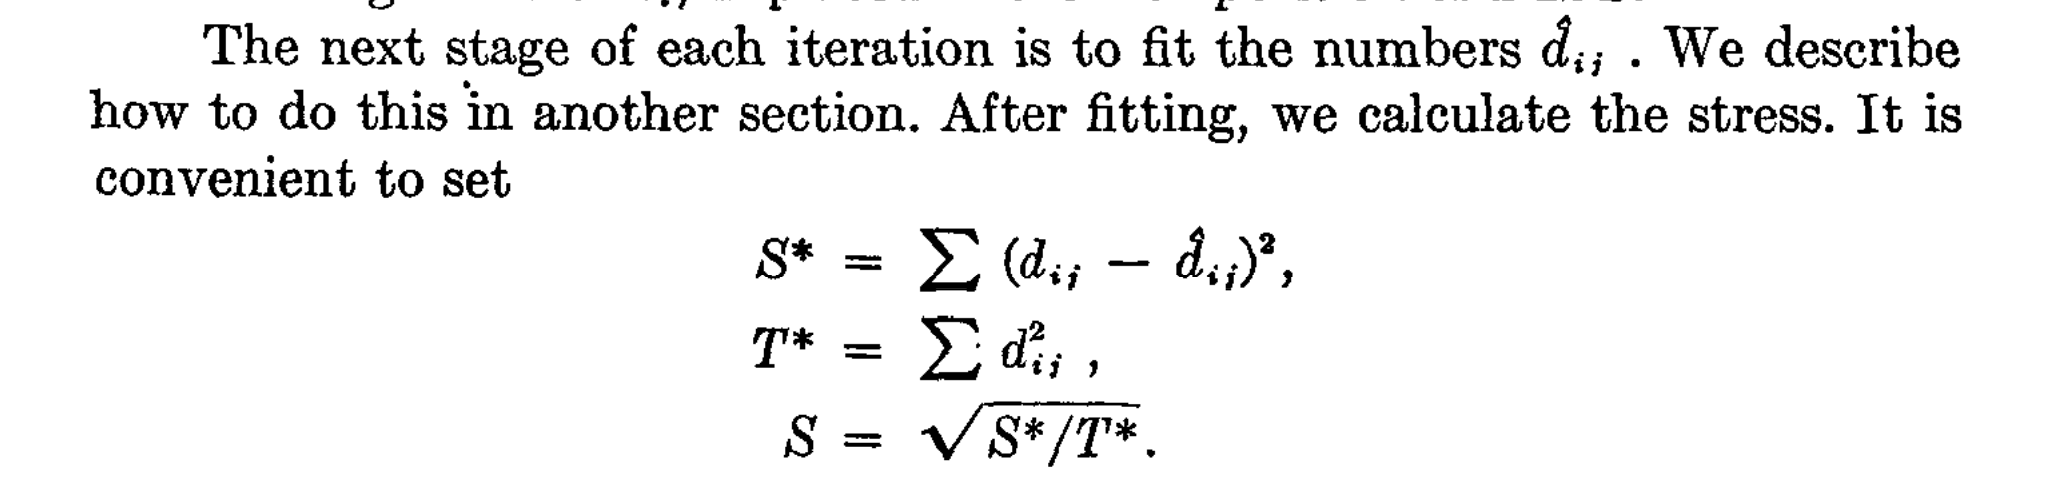
Stress Loss function from Kruskal, 1964

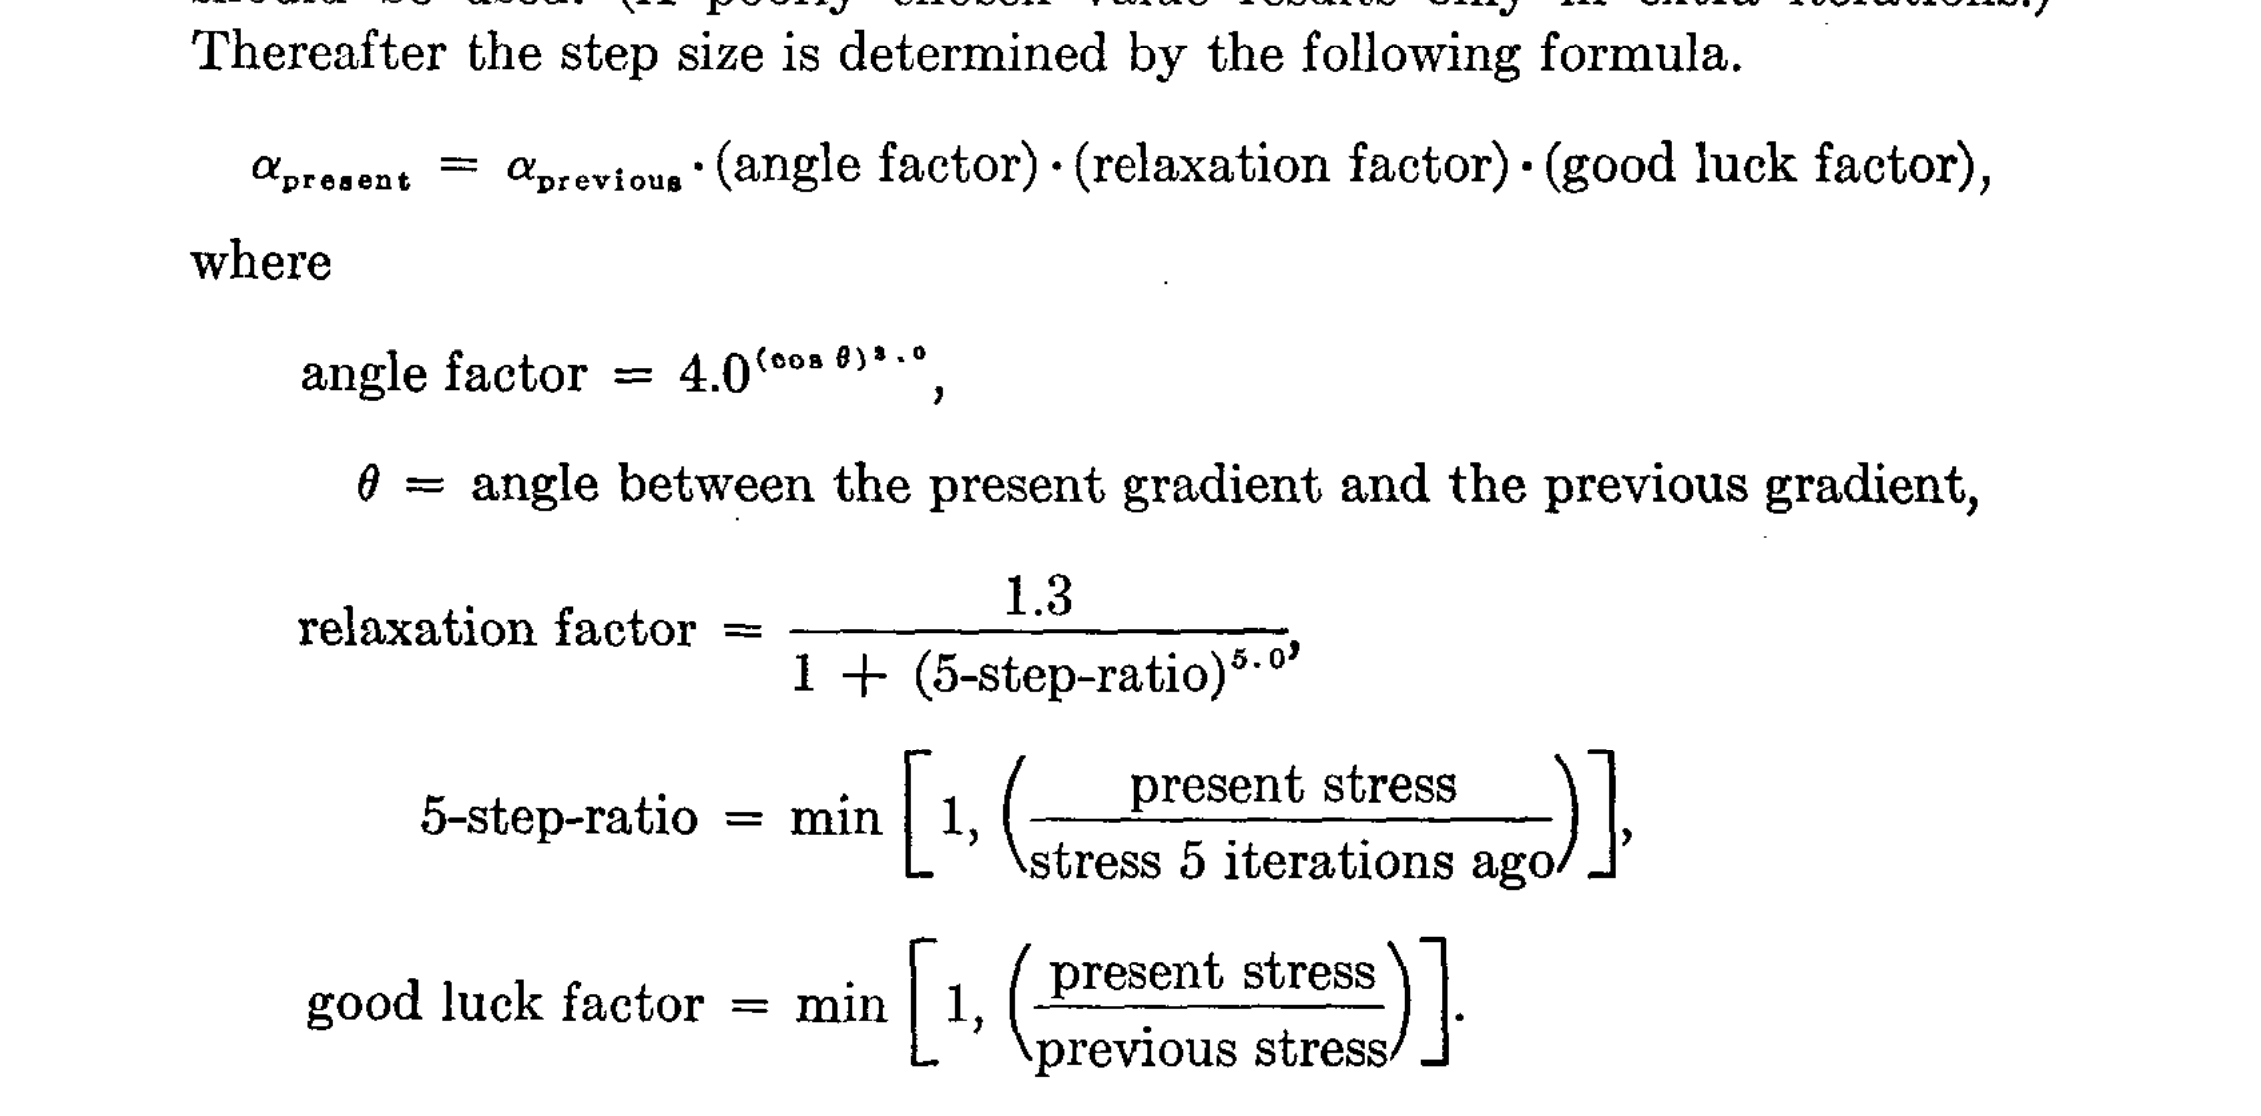
Optimizer from Kruskal, 1964

In [3]:
## Steps 
### Define configuration 
#### for each training iteration
#### normalize 
#### find pairwise distances
#### monotone regression
#### gradient descent



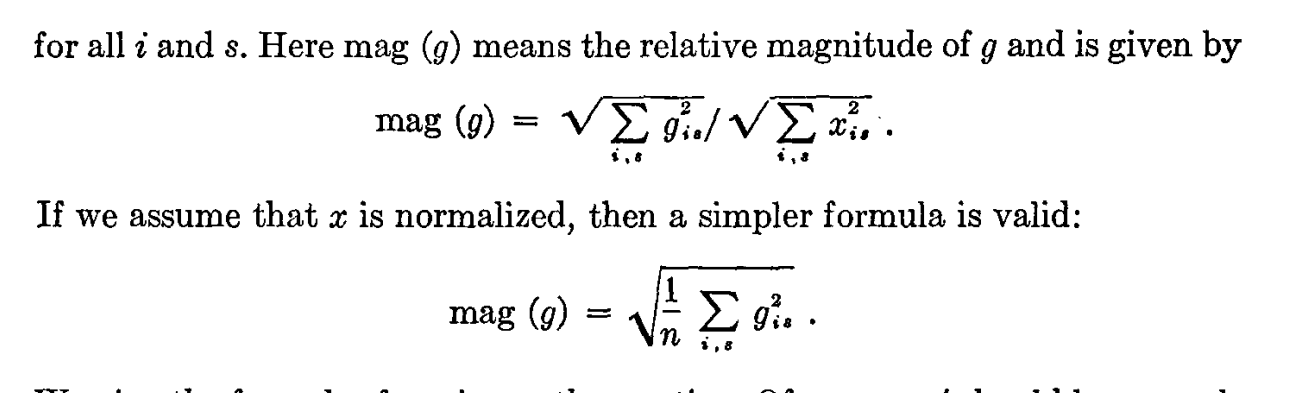

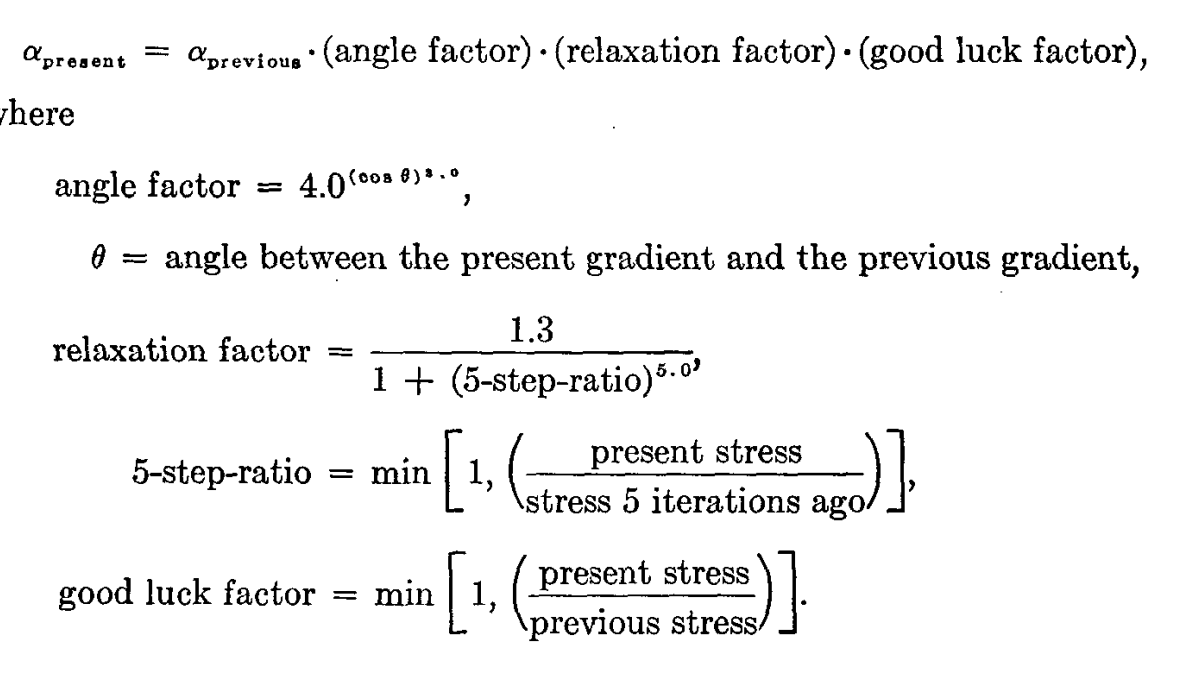

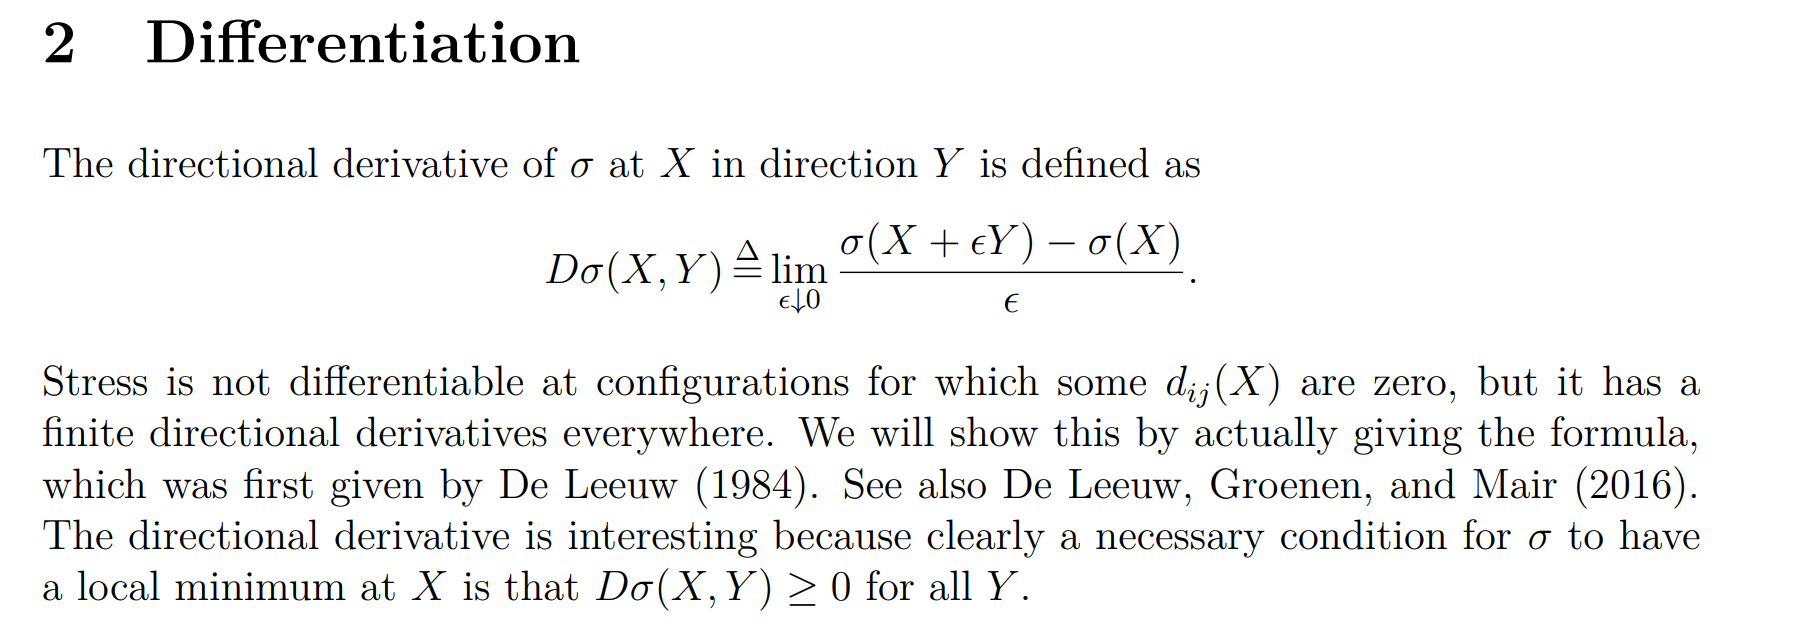
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/

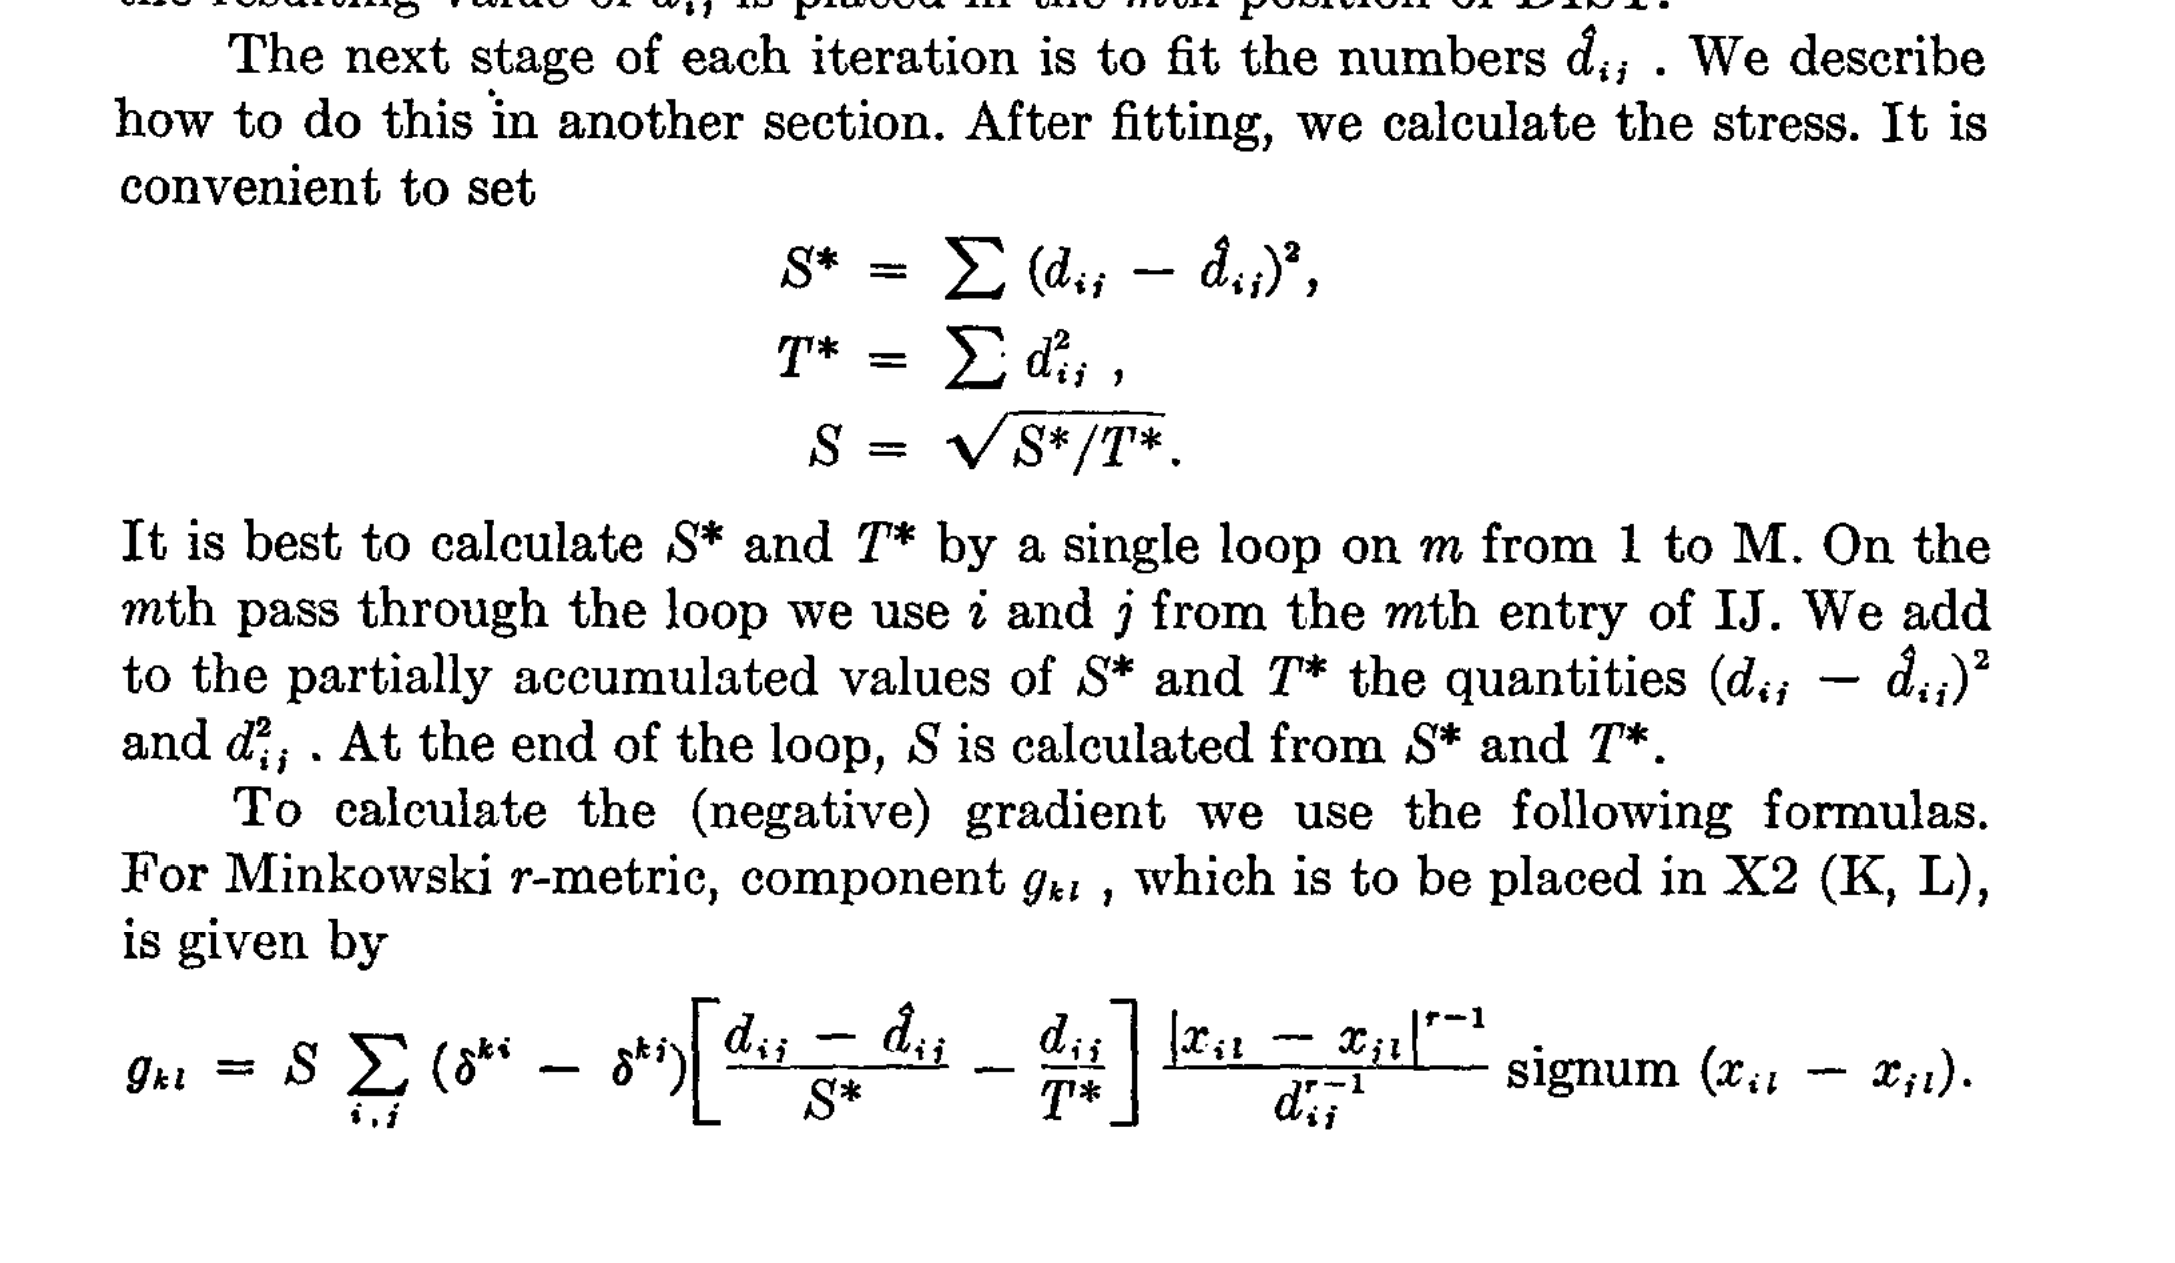
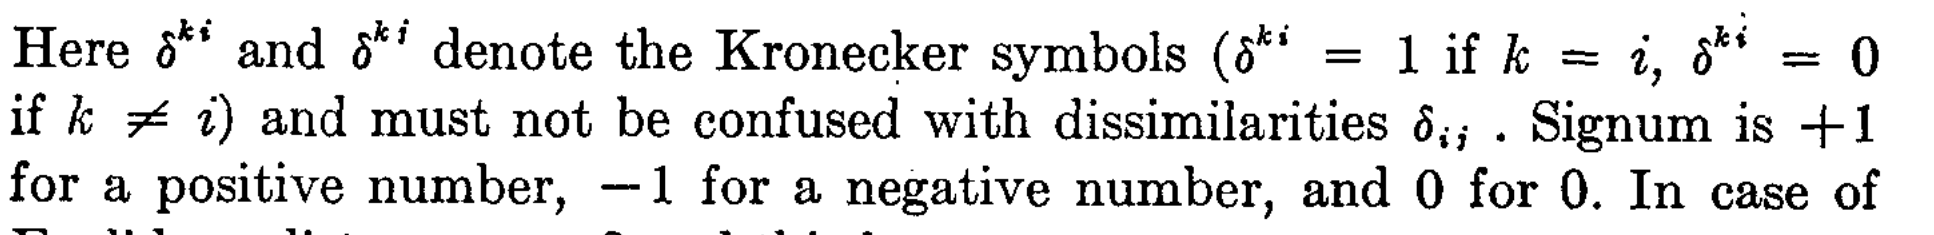
From Kruskal, 1964

In [4]:
morse_data 

,.-,-...,-.-.,-..,.,..-.,--.,....,..,.---,...,.----,..---,...--,....-,.....,-....,--...,---..,----.,-----
.-,0,167,169,159,180,164,163,163,75,165,...,172,167,170,170,166,167,166,172,178,174
-...,167,0,96,79,163,95,139,105,165,141,...,151,142,148,114,97,18,93,133,157,171
-.-.,169,96,0,141,166,115,137,144,162,115,...,148,139,121,143,152,115,122,112,137,158
-..,159,79,141,0,172,136,100,114,159,151,...,166,163,163,154,155,140,151,161,171,174
.,180,163,166,172,0,183,182,171,163,179,...,174,179,174,175,180,179,173,181,184,183
..-.,164,95,115,136,183,0,156,116,170,118,...,161,143,97,129,109,131,129,159,170,172
--.,163,139,137,100,182,156,0,163,172,135,...,146,152,165,155,172,164,152,141,147,159
....,163,105,144,114,171,116,163,0,158,157,...,164,164,146,117,40,126,151,166,170,174
..,75,165,162,159,163,170,172,158,0,171,...,173,152,169,166,170,171,167,178,178,177
.---,165,141,115,151,179,118,135,157,171,0,...,73,82,115,138,154,151,118,112,120,126


In [5]:
morseilarity_vec = np.tril(morse_data, -1)
dismorseilarities = morseilarity_vec[np.nonzero(morseilarity_vec)] + 0.
# dismorseilarities = np.exp(-1*morseilarity_vec)
dismorseilarities/= np.linalg.norm(dismorseilarities)

2022-08-31 05:00:00.731 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.5207137434063251
2022-08-31 05:00:00.735 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0
2022-08-31 05:00:00.737 | INFO     | src.autograd_mds:my_mds_training_loop:215 - Starting Stress: 0.7216049773985246
2022-08-31 05:00:01.076 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 0.5207137434063251
2022-08-31 05:00:01.078 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0
2022-08-31 05:00:01.165 | INFO     | src.autograd_mds:my_mds_training_loop:218 - Starting Gradient magnitude: 0.7876968329499808


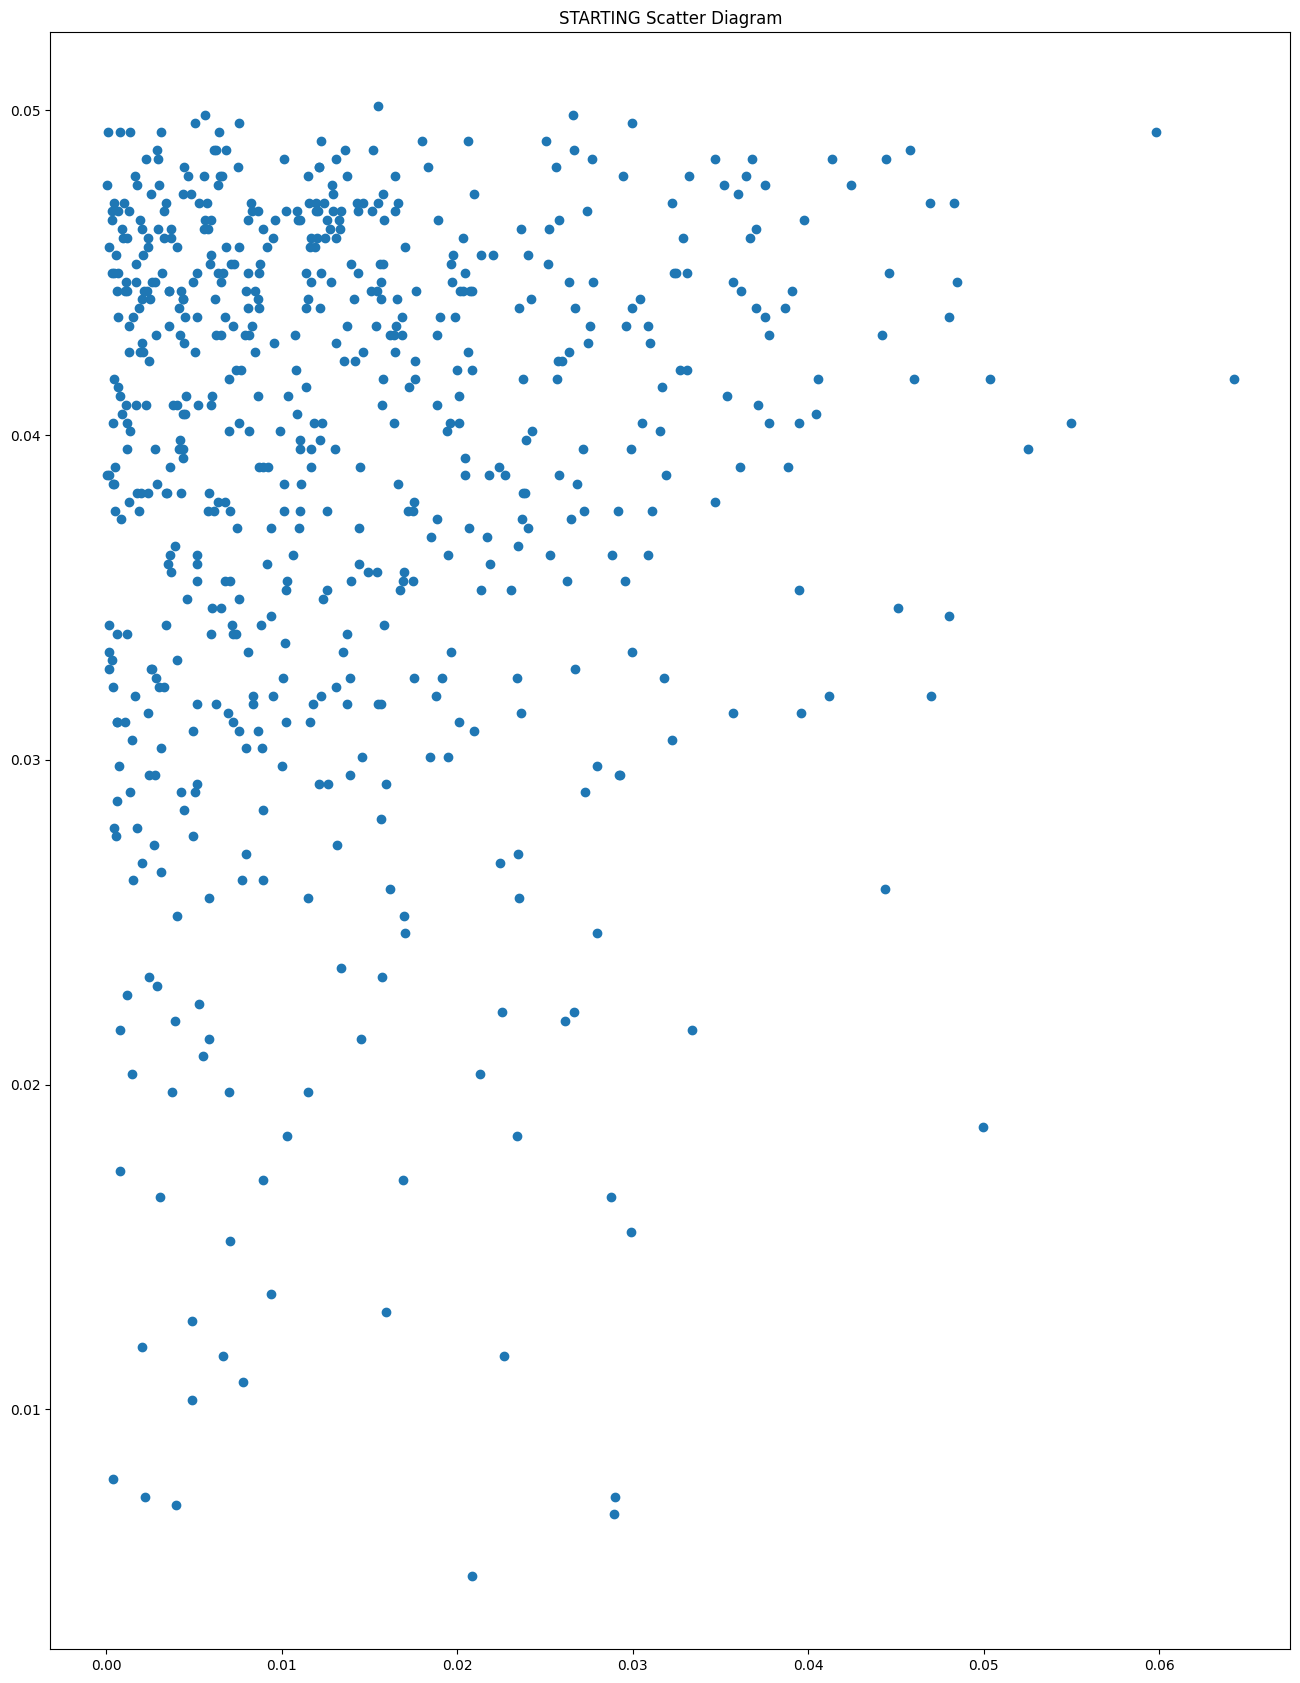

/usr/local/lib/python3.8/dist-packages/numpy/core/numeric.py:2457: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a1, a2 = asarray(a1), asarray(a2)
2022-08-31 05:00:06.036 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.07249893399933952
2022-08-31 05:00:06.037 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0
2022-08-31 05:00:06.040 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.26925626083591725
2022-08-31 05:00:06.308 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 0.5207137434063251
2022-08-31 05:00:06.310 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0
2022-08-31 05:00:06.427 | INFO     | src.autograd_mds:my_mds_training_loop:241 - Gradient magnitude: 0.7876968329499808


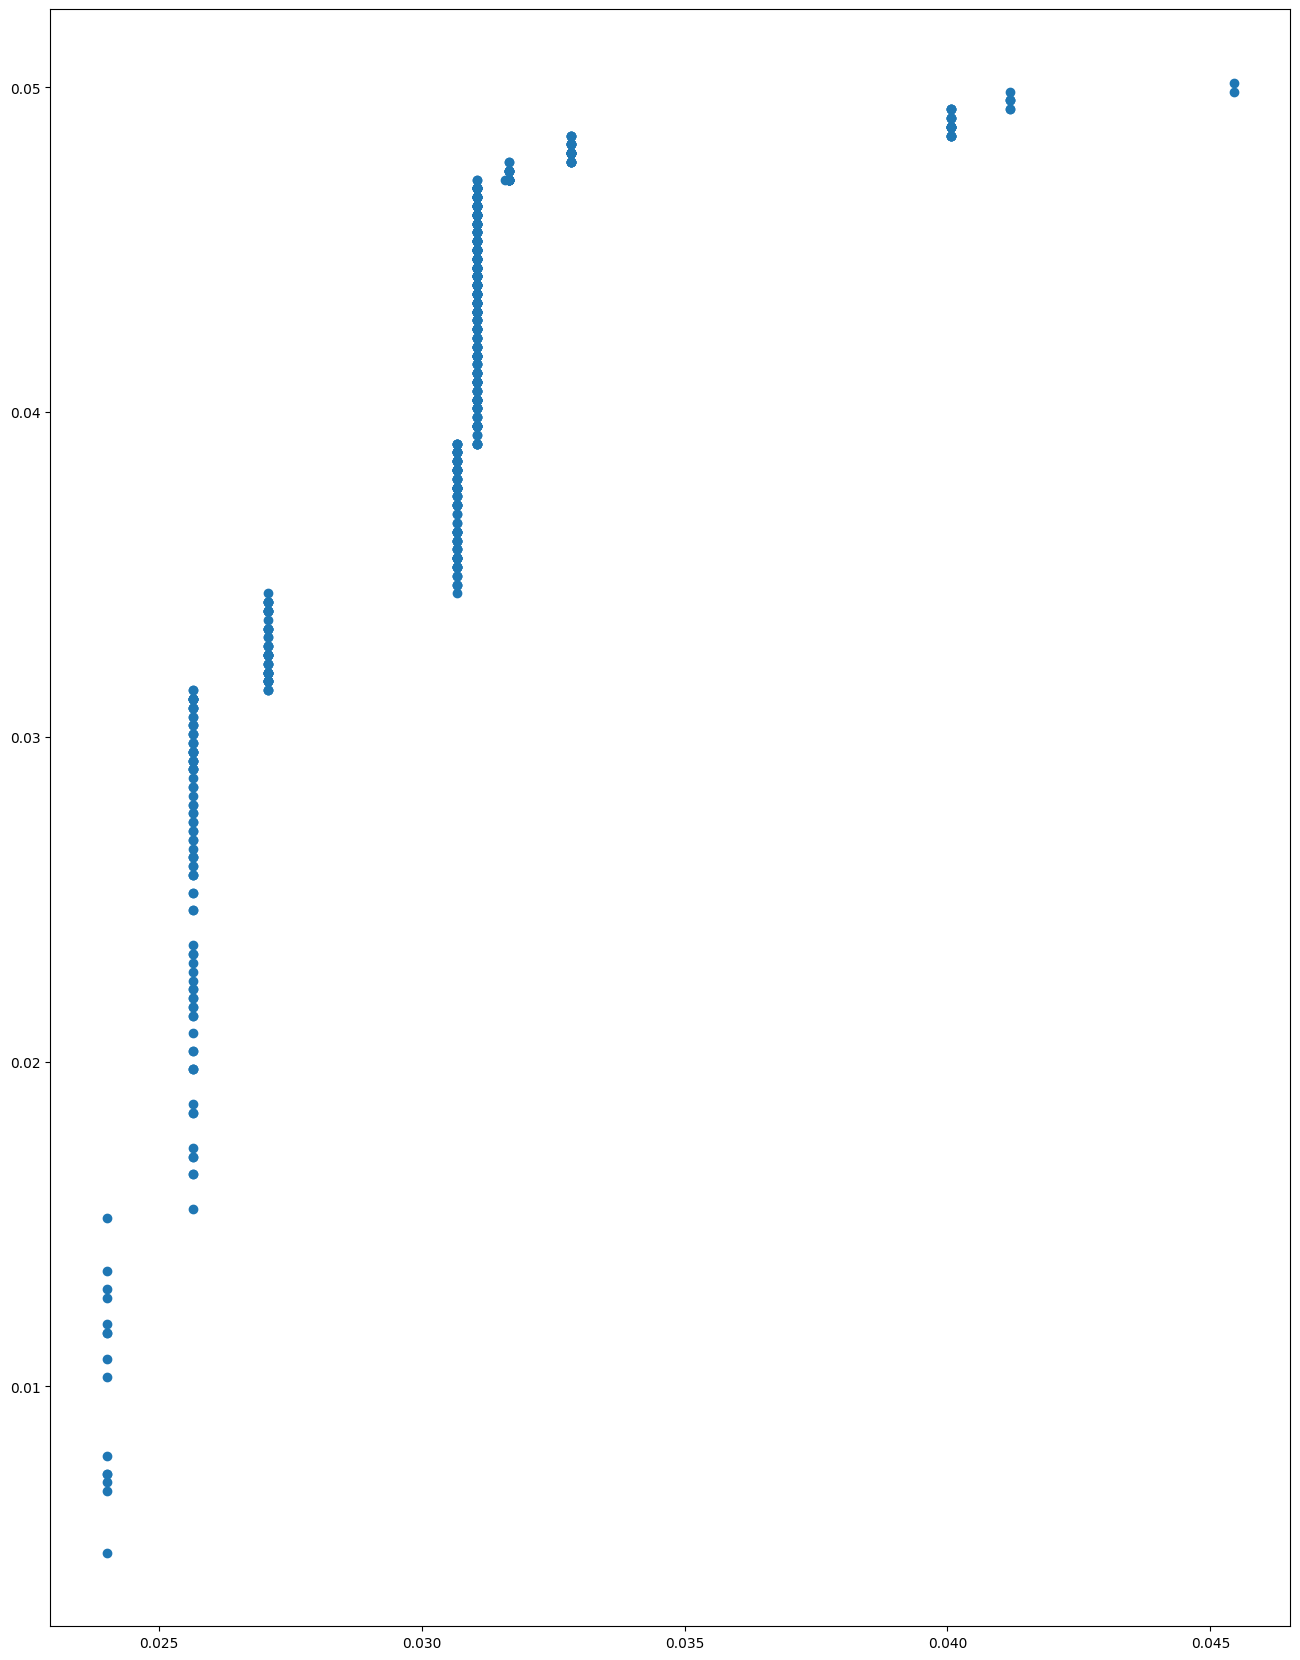

2022-08-31 05:00:11.094 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.04980157854227797
2022-08-31 05:00:11.096 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0
2022-08-31 05:00:11.098 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.2231626728247311
2022-08-31 05:00:11.200 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 149683.8106897655
2022-08-31 05:00:11.202 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0
2022-08-31 05:00:11.307 | INFO     | src.autograd_mds:my_mds_training_loop:241 - Gradient magnitude: 54.61329009323755


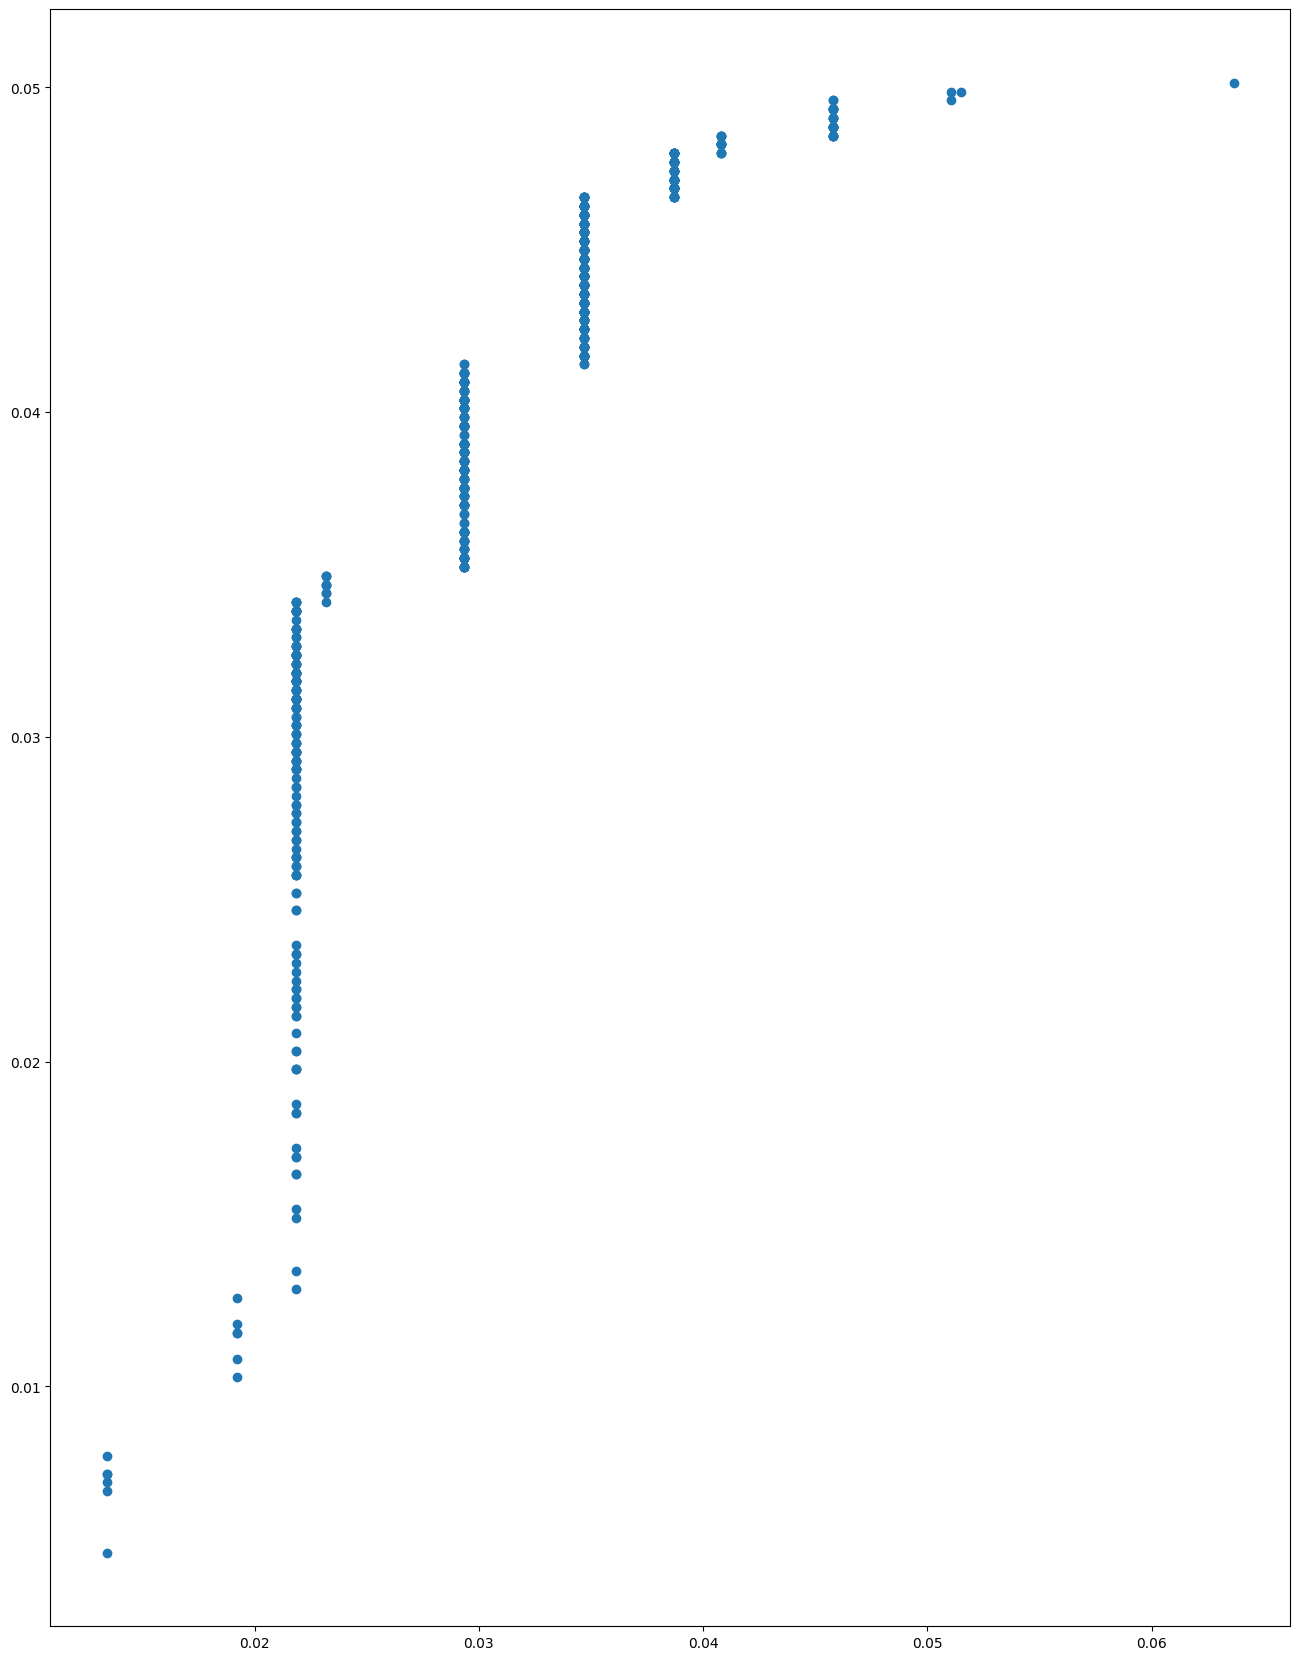

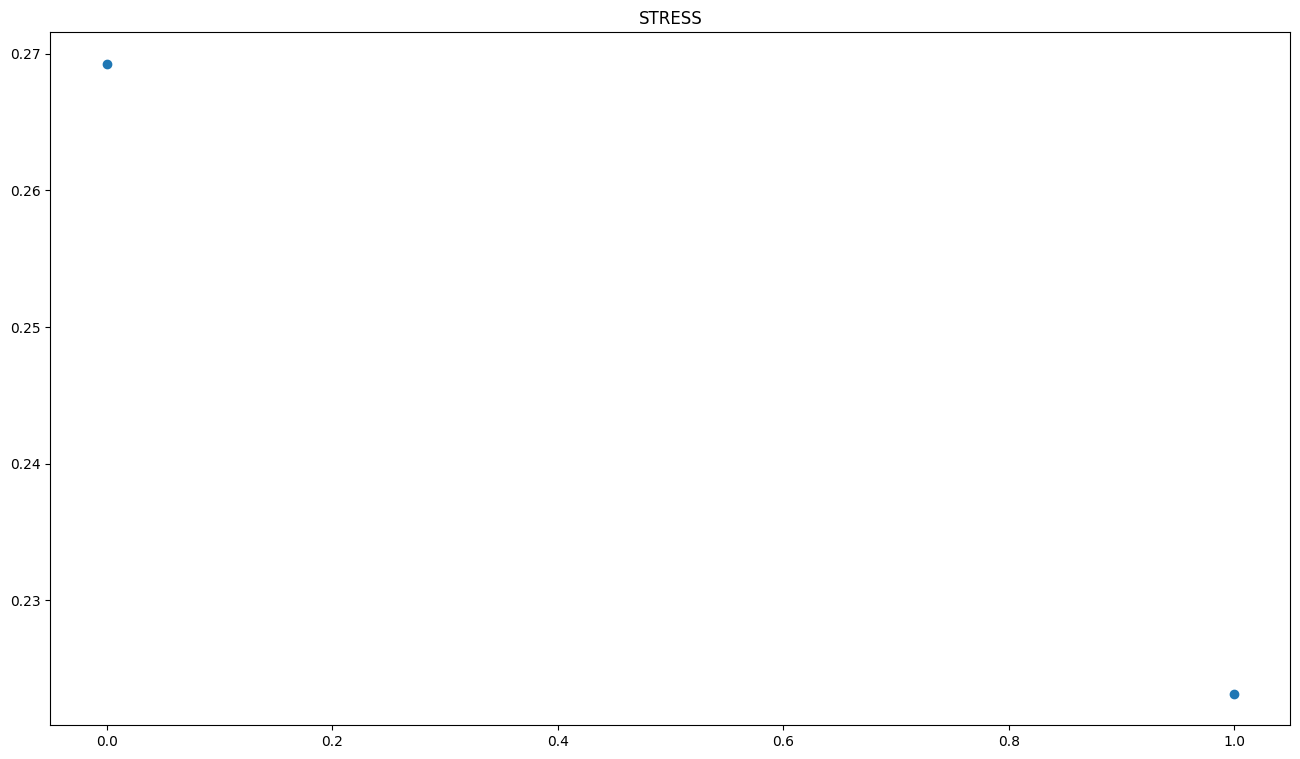

In [6]:
morse_config = my_mds_training_loop(dismorseilarities, n_init=1, eps=1e-1, dim =2)

In [7]:
refMDS = MDS(dissimilarity="precomputed",metric=False,n_init=50)

In [8]:
promorse_config = refMDS.fit_transform(morse_data)

In [9]:
promorse_config /= np.sqrt((promorse_config**2).sum())
morse_config /= np.sqrt((morse_config**2).sum())
# Rotate the data
clf = PCA(n_components=2)



promorse_config = clf.fit_transform(promorse_config)
morse_config = clf.fit_transform(morse_config)

fig, ax = plt.subplots(2,1, figsize=(16,32), dpi=600)
ax[0].scatter(x=morse_config[:,0], y=morse_config[:,1])
for i, label in enumerate(morse_data.index.to_list()):
       ax[0].annotate(label, (morse_config[i,0], morse_config[i,1]), fontsize=16)


ax[1].scatter(x=promorse_config[:,0], y=promorse_config[:,1], color='red')
for i, label in enumerate(morse_data.index.to_list()):
       ax[1].annotate(label, (promorse_config[i,0], promorse_config[i,1]), fontsize=16)

# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()

In [10]:
promorse_config /= np.sqrt((promorse_config**2).sum())
morse_config /= np.sqrt((morse_config**2).sum())
# Rotate the data
clf = PCA(n_components=2)



promorse_config = clf.fit_transform(promorse_config)
morse_config = clf.fit_transform(morse_config)

fig, ax = plt.subplots(1,1, figsize=(16,32), dpi=600)
ax.scatter(x=morse_config[:,0], y=morse_config[:,1])
for i, label in enumerate(morse_data.index.to_list()):
       ax.annotate(label, (morse_config[i,0], morse_config[i,1]), fontsize=16)


ax.scatter(x=promorse_config[:,0], y=promorse_config[:,1], color='red')
for i, label in enumerate(morse_data.index.to_list()):
       ax.annotate(label, (promorse_config[i,0], promorse_config[i,1]), fontsize=16)

# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()